# Prediction using Supervised ML
### This notebbook is written using Python 3

First we will read data using panda library

In [1]:
# Importing libraries to work on data
import pandas as pd
import numpy as np

# Here we set the url of the given data in a variable 'url'
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# With help of read_csv method we can read data
data = pd.read_csv(url)

### In this sectioin we will view the data

In [2]:
# Top 5 rows of DataFrame
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Here is the Statistic of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualising Data

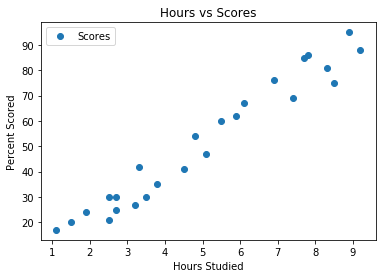

In [4]:
#Plotting the distribution of scores
import matplotlib.pyplot as plt
data.plot(x='Hours',y='Scores',style = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percent Scored')
plt.show()

### In this section
* We will define Linear Regression model
* We will split data to train and test using train_test_split method
* We will fit the model and predict afterwards
* We will check efficiency of model my calculating mean absolute error and score of the model

In [5]:
# Creating Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
# Going to reshape array to 2d as there is only one column
X = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores']).reshape(-1,1)

In [7]:
# Splitting our data to train and test our model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size = 0.2, random_state = 1)

In [8]:
# Fitting out model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#Predicted values
pred = lr.predict(X_test)
pred

array([[ 9.97026179],
       [32.98470004],
       [18.33914843],
       [87.38246316],
       [48.67636248]])

In [25]:
# Mean Absolute Error of the data
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,pred)
print("Mean Absolute Error - " + str(mae))

Mean Absolute Error - 7.882398086270432


In [32]:
# Score of the model in percentage
sc = lr.score(X_test,y_test)
print("Score of the model is " + str(sc*100) + " %")

Score of the model is 84.21031525243528 %


### Here we will plot the regression line in the graph

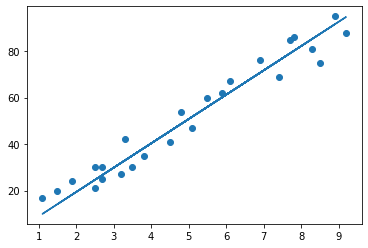

In [13]:
# Plotting the regression line
line = lr.coef_*X+ lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Predicting Score of the Student who studied 9.25 Hours

In [33]:
# Again fitting model with complete data this time
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Making an entry with 9.25 hours as input should be in array
student = np.array([9.25])
p_value = student.reshape(-1,1)

In [40]:
final_score = final_model.predict(p_value)
print("Student who studied 9.25 Hours will score "+ str(final_score))

Student who studied 9.25 Hours will score [[92.90985477]]
